<a href="https://colab.research.google.com/github/Vishal-257/EDA_DA/blob/main/eda_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21BDS0257 - VISHAL KUMAR YADAV

In [459]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [431]:
df = pd.read_csv('/content/happiness.csv')

In [432]:
df.head(n=10)

,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
5,6,1994,working parttime,43.0,NaN,NaN,15.0,middle atlantic,0.0,0.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
6,7,1994,working fulltime,20.0,no,NaN,9.0,middle atlantic,0.0,1.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
7,8,1994,working fulltime,44.0,NaN,NaN,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,0.0
8,9,1994,working fulltime,42.0,no,NaN,12.0,foreign,2.0,1.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
9,10,1994,working fulltime,46.0,NaN,iap,12.0,middle atlantic,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,1.0


In [433]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 17137, Columns: 34


In [434]:
print(df.info())
print(df.describe())
categorical_columns = df.select_dtypes(include=['object']).columns
print(df[categorical_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      9754 non-null   object 
 5   widowed      11096 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       15045 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       11297 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

In [435]:
print(df.isnull().sum())

rownames           0
year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [436]:
df = df.drop(['year','rownames','gwbush00','unem10','gwbush04'],axis = 1)

In [437]:
print(df.columns)

Index(['workstat', 'prestige', 'divorce', 'widowed', 'educ', 'reg16', 'babies',
       'preteen', 'teens', 'income', 'region', 'attend', 'happy', 'owngun',
       'tvhours', 'vhappy', 'mothfath16', 'black', 'female', 'blackfemale',
       'occattend', 'regattend', 'y94', 'y96', 'y98', 'y00', 'y02', 'y04',
       'y06'],
      dtype='object')


In [438]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        mode_value = df[column].mode().iloc[0]
        df[column].fillna(mode_value, inplace=True)

print(df.columns)

Index(['workstat', 'prestige', 'divorce', 'widowed', 'educ', 'reg16', 'babies',
       'preteen', 'teens', 'income', 'region', 'attend', 'happy', 'owngun',
       'tvhours', 'vhappy', 'mothfath16', 'black', 'female', 'blackfemale',
       'occattend', 'regattend', 'y94', 'y96', 'y98', 'y00', 'y02', 'y04',
       'y06'],
      dtype='object')


<ipython-input-438-c5c2664b7f51>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [439]:
corr_df = df.copy()
columns = corr_df.columns
for col in columns:
  if(corr_df[col].dtype!=int and corr_df[col].dtype!=float):
    corr_df.drop(columns=col, inplace=True)

In [440]:
correlation_matrix = corr_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             prestige      educ    babies   preteen     teens   tvhours  \
prestige     1.000000  0.487166 -0.008899 -0.007349 -0.018753 -0.145115   
educ         0.487166  1.000000 -0.005106 -0.007365 -0.021564 -0.196980   
babies      -0.008899 -0.005106  1.000000  0.181553 -0.034617 -0.013476   
preteen     -0.007349 -0.007365  0.181553  1.000000  0.180731 -0.039959   
teens       -0.018753 -0.021564 -0.034617  0.180731  1.000000 -0.035781   
tvhours     -0.145115 -0.196980 -0.013476 -0.039959 -0.035781  1.000000   
vhappy       0.090141  0.084362  0.016689  0.008299 -0.010801 -0.061066   
mothfath16   0.100371  0.136396 -0.042267 -0.032175 -0.002041 -0.057855   
black       -0.106988 -0.113373  0.041581  0.056398  0.062099  0.155941   
female      -0.005642 -0.038590  0.059195  0.052714  0.032525  0.032782   
blackfemale -0.069114 -0.089871  0.065300  0.071057  0.070154  0.125958   
occattend    0.006658  0.036563  0.044713  0.026420  0.008930 -0.022757   
regat

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns

Index(['workstat', 'prestige', 'divorce', 'widowed', 'educ', 'reg16', 'babies',
       'preteen', 'teens', 'income', 'region', 'attend', 'happy', 'owngun',
       'tvhours', 'vhappy', 'mothfath16', 'black', 'female', 'blackfemale',
       'occattend', 'regattend', 'y94', 'y96', 'y98', 'y00', 'y02', 'y04',
       'y06'],
      dtype='object')

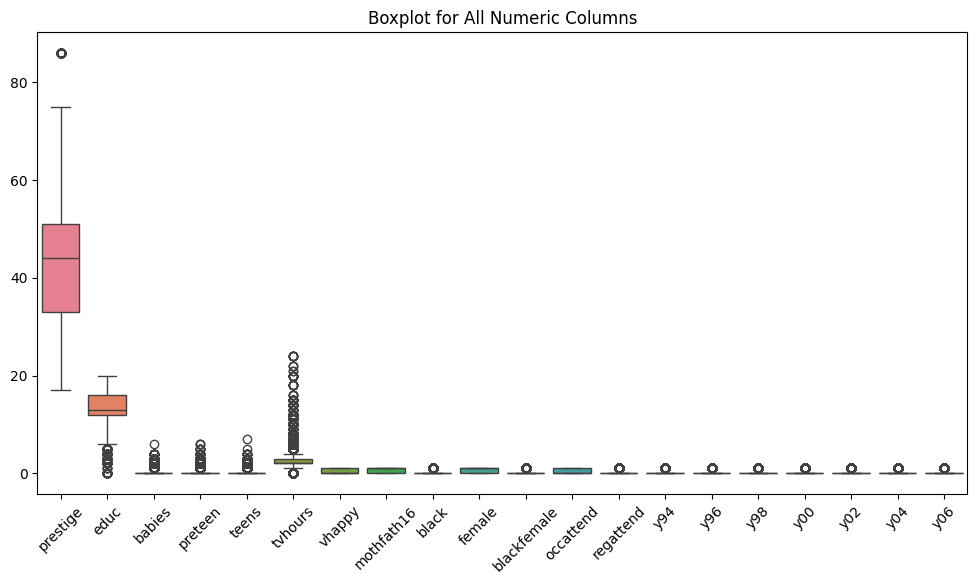

In [442]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [443]:
for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

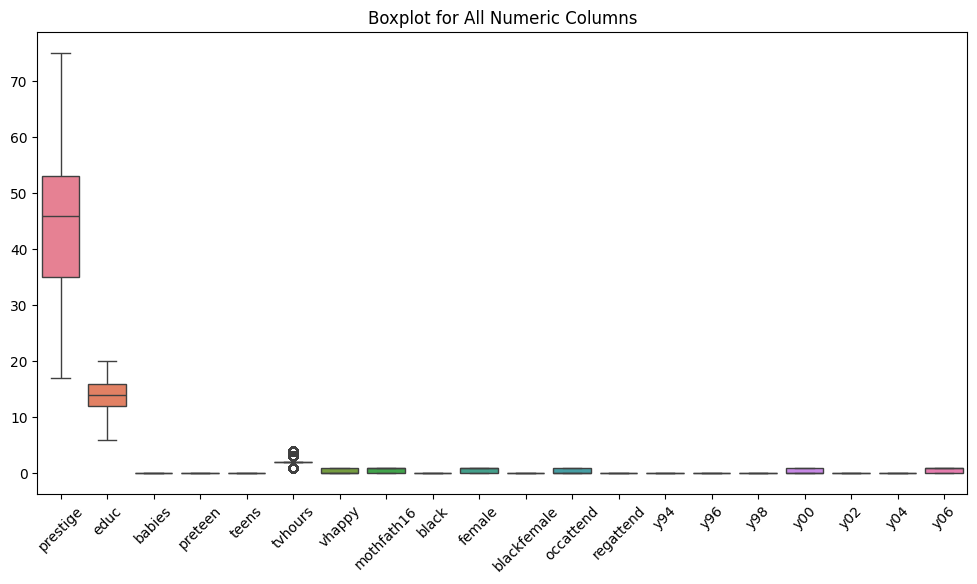

In [444]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [445]:
df.head()

,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,income,...,blackfemale,occattend,regattend,y94,y96,y98,y00,y02,y04,y06
8670,keeping house,51.0,yes,iap,13.0,w. sou. central,0.0,0.0,0.0,$15000 - 19999,...,0,0.0,0.0,0,0,0,1,0,0,0
8671,working fulltime,21.0,no,iap,14.0,w. sou. central,0.0,0.0,0.0,$25000 or more,...,0,1.0,0.0,0,0,0,1,0,0,0
8672,working fulltime,65.0,no,iap,14.0,w. sou. central,0.0,0.0,0.0,$25000 or more,...,0,0.0,0.0,0,0,0,1,0,0,0
8673,working fulltime,39.0,no,iap,12.0,w. sou. central,0.0,0.0,0.0,$25000 or more,...,0,0.0,0.0,0,0,0,1,0,0,0
8674,working fulltime,34.0,no,iap,14.0,w. sou. central,0.0,0.0,0.0,$25000 or more,...,0,1.0,0.0,0,0,0,1,0,0,0


In [446]:
for col in df.columns:
  print(col," unique values:",len(df[col].unique()))

workstat  unique values: 8
prestige  unique values: 58
divorce  unique values: 2
widowed  unique values: 2
educ  unique values: 15
reg16  unique values: 10
babies  unique values: 1
preteen  unique values: 1
teens  unique values: 1
income  unique values: 12
region  unique values: 9
attend  unique values: 7
happy  unique values: 3
owngun  unique values: 2
tvhours  unique values: 4
vhappy  unique values: 2
mothfath16  unique values: 2
black  unique values: 1
female  unique values: 2
blackfemale  unique values: 1
occattend  unique values: 2
regattend  unique values: 1
y94  unique values: 1
y96  unique values: 1
y98  unique values: 1
y00  unique values: 2
y02  unique values: 1
y04  unique values: 1
y06  unique values: 2


In [447]:
#dropping the columns with only 1 values
for col in df.columns:
  if len(df[col].unique()) == 1:
    df.drop(columns= col, inplace=True)
df.head()

,workstat,prestige,divorce,widowed,educ,reg16,income,region,attend,happy,owngun,tvhours,vhappy,mothfath16,female,occattend,y00,y06
8670,keeping house,51.0,yes,iap,13.0,w. sou. central,$15000 - 19999,w. sou. central,never,pretty happy,iap,2.0,0,0.0,1,0.0,1,0
8671,working fulltime,21.0,no,iap,14.0,w. sou. central,$25000 or more,w. sou. central,2-3x a month,very happy,iap,4.0,1,1.0,1,1.0,1,0
8672,working fulltime,65.0,no,iap,14.0,w. sou. central,$25000 or more,w. sou. central,once a year,pretty happy,iap,1.0,0,1.0,1,0.0,1,0
8673,working fulltime,39.0,no,iap,12.0,w. sou. central,$25000 or more,w. sou. central,never,pretty happy,iap,2.0,0,0.0,1,0.0,1,0
8674,working fulltime,34.0,no,iap,14.0,w. sou. central,$25000 or more,w. sou. central,sevrl times a yr,very happy,iap,3.0,1,1.0,0,1.0,1,0


In [448]:
for col in df.columns:
  print(col,"unique values: ",df[col].unique())

workstat unique values:  ['keeping house' 'working fulltime' 'unempl, laid off' 'retired' 'school'
 'other' 'working parttime' 'temp not working']
prestige unique values:  [51. 21. 65. 39. 34. 64. 59. 45. 66. 47. 57. 40. 31. 74. 49. 33. 54. 69.
 28. 23. 32. 44. 29. 41. 35. 36. 30. 73. 62. 48. 61. 20. 43. 22. 46. 52.
 68. 60. 42. 53. 75. 56. 50. 38. 58. 37. 55. 19. 63. 27. 67. 25. 71. 24.
 72. 26. 17. 70.]
divorce unique values:  ['yes' 'no']
widowed unique values:  ['iap' 'yes']
educ unique values:  [13. 14. 12. 18. 16. 15. 17. 11. 19.  6. 10.  8.  9. 20.  7.]
reg16 unique values:  ['w. sou. central' 'e. nor. central' 'middle atlantic' 'pacific'
 'w. nor. central' 'mountain' 'foreign' 'e. sou. central' 'south atlantic'
 'new england']
income unique values:  ['$15000 - 19999' '$25000 or more' '$20000 - 24999' '$10000 - 14999'
 '$1000 to 2999' '$8000 to 9999' 'lt $1000' '$3000 to 3999'
 '$7000 to 7999' '$6000 to 6999' '$4000 to 4999' '$5000 to 5999']
region unique values:  ['w. sou. cent

In [449]:
en = LabelEncoder()
for col in df.columns:
  if df[col].dtype == object:
    df[col] = en.fit_transform(df[col])

In [450]:
for col in df.columns:
  print(col,"unique values: ",df[col].unique())

workstat unique values:  [0 6 5 2 3 1 7 4]
prestige unique values:  [51. 21. 65. 39. 34. 64. 59. 45. 66. 47. 57. 40. 31. 74. 49. 33. 54. 69.
 28. 23. 32. 44. 29. 41. 35. 36. 30. 73. 62. 48. 61. 20. 43. 22. 46. 52.
 68. 60. 42. 53. 75. 56. 50. 38. 58. 37. 55. 19. 63. 27. 67. 25. 71. 24.
 72. 26. 17. 70.]
divorce unique values:  [1 0]
widowed unique values:  [0 1]
educ unique values:  [13. 14. 12. 18. 16. 15. 17. 11. 19.  6. 10.  8.  9. 20.  7.]
reg16 unique values:  [9 0 3 6 8 4 2 1 7 5]
income unique values:  [ 2  4  3  1  0 10 11  5  9  8  6  7]
region unique values:  [8 0 2 5 4 7 3 6 1]
attend unique values:  [3 0 5 6 1 2 4]
happy unique values:  [1 2 0]
owngun unique values:  [0 1]
tvhours unique values:  [2. 4. 1. 3.]
vhappy unique values:  [0 1]
mothfath16 unique values:  [0. 1.]
female unique values:  [1 0]
occattend unique values:  [0. 1.]
y00 unique values:  [1 0]
y06 unique values:  [0 1]


In [451]:
#Kmeans Clusterning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
X = df.copy() # copying the data as we will use df for other algorithms too
colname = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [456]:
x = pd.DataFrame(X,columns=colname)
x.head()

,workstat,prestige,divorce,widowed,educ,reg16,income,region,attend,happy,owngun,tvhours,vhappy,mothfath16,female,occattend,y00,y06
0,0.000000,0.586207,1.0,0.0,0.500000,1.0,0.181818,1.0,0.500000,0.5,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0
1,0.857143,0.068966,0.0,0.0,0.571429,1.0,0.363636,1.0,0.000000,1.0,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0
2,0.857143,0.827586,0.0,0.0,0.571429,1.0,0.363636,1.0,0.833333,0.5,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0
3,0.857143,0.379310,0.0,0.0,0.428571,1.0,0.363636,1.0,0.500000,0.5,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0
4,0.857143,0.293103,0.0,0.0,0.571429,1.0,0.363636,1.0,1.000000,1.0,0.0,0.666667,1.0,1.0,0.0,1.0,1.0,0.0


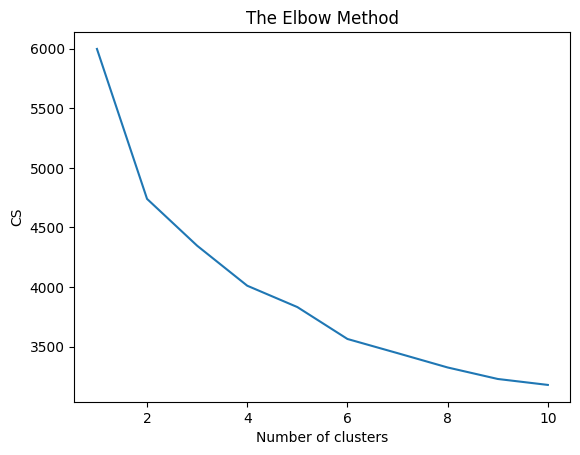

In [458]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [478]:
print("For k = ",2)
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

For k =  2


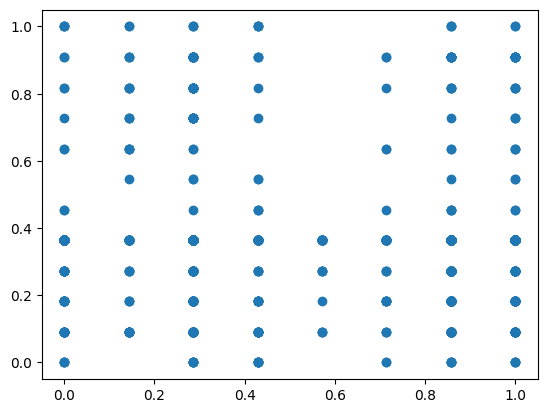

In [479]:
plt.scatter(x['workstat'],x['income'])

Text(0.5, 1.0, 'KMeans Clustering (2 clusters)')

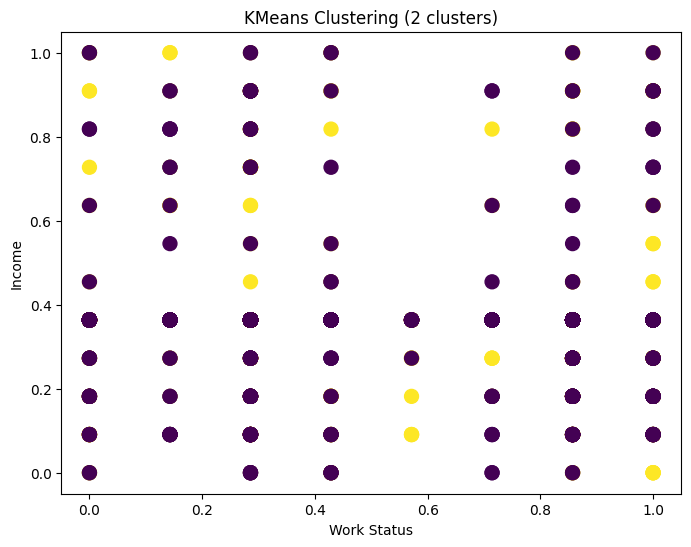

In [481]:
x['cluster'] = labels
plt.figure(figsize=(8, 6))
plt.scatter(x['workstat'], x['income'], c=x['cluster'], cmap='viridis', s=100)
plt.xlabel('Work Status')
plt.ylabel('Income')
plt.title('KMeans Clustering (2 clusters)')

In [482]:
#KNN Algorithm
knn_x = df.copy()

In [493]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [485]:
x = knn_x.drop(columns = "happy")
y = knn_x["happy"]

In [486]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [487]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

accuracy:  0.548941798941799
[[  5  73   4]
 [ 31 347  58]
 [ 13 162  63]]


<Axes: >

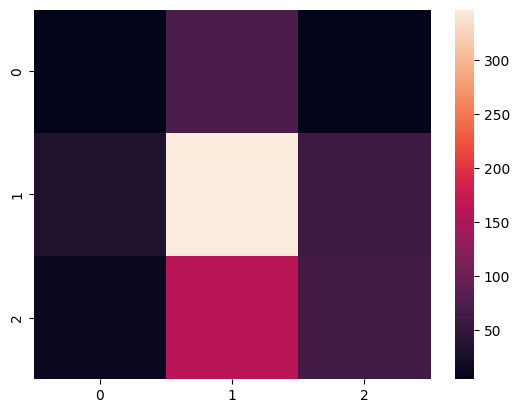

In [494]:
y_pred = knn.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [495]:
#Hierarchical clustering
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [496]:
X = df.copy() # copying the data as we will use df for other algorithms too
colname = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [497]:
x = pd.DataFrame(X,columns=colname)
x.head()

,workstat,prestige,divorce,widowed,educ,reg16,income,region,attend,happy,owngun,tvhours,vhappy,mothfath16,female,occattend,y00,y06
0,0.000000,0.586207,1.0,0.0,0.500000,1.0,0.181818,1.0,0.500000,0.5,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0
1,0.857143,0.068966,0.0,0.0,0.571429,1.0,0.363636,1.0,0.000000,1.0,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0
2,0.857143,0.827586,0.0,0.0,0.571429,1.0,0.363636,1.0,0.833333,0.5,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0
3,0.857143,0.379310,0.0,0.0,0.428571,1.0,0.363636,1.0,0.500000,0.5,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0
4,0.857143,0.293103,0.0,0.0,0.571429,1.0,0.363636,1.0,1.000000,1.0,0.0,0.666667,1.0,1.0,0.0,1.0,1.0,0.0


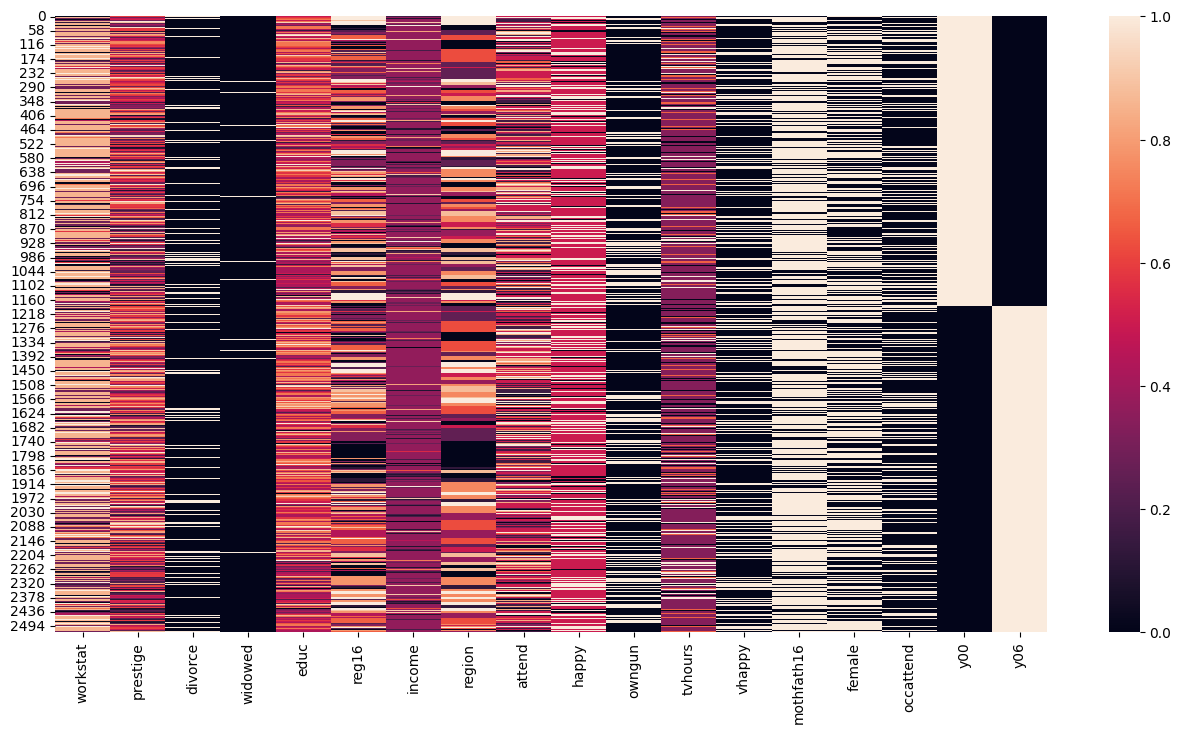

In [498]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(x)
plt.show()

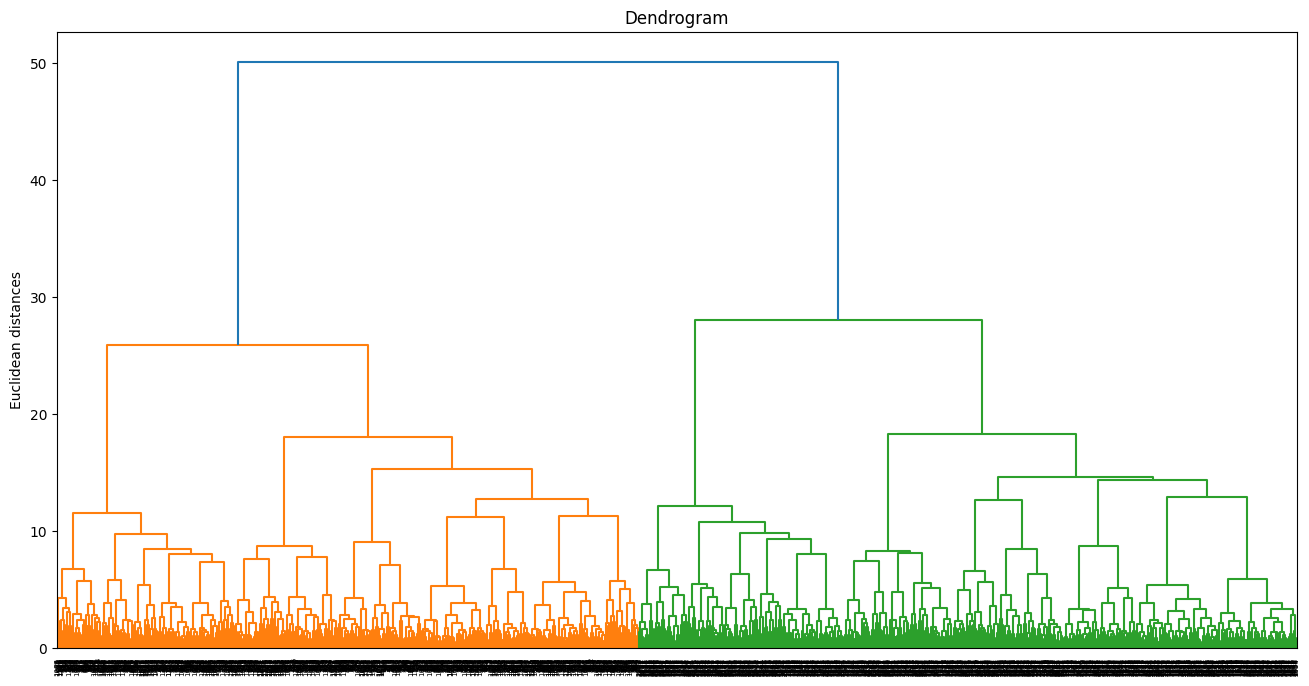

In [499]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))

plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [503]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage ='average')
y_hc = hc.fit_predict(x)
y_hc

array([2, 2, 2, ..., 0, 0, 0])

In [504]:
x['cluster'] = pd.DataFrame(y_hc)

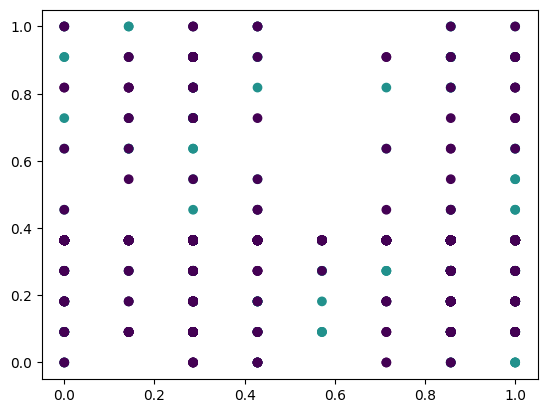

In [505]:
plt.scatter(x['workstat'],x['income'],c=x['cluster'])